# Clusterização

## O que é clusterização?

Clusterização é a tarefa de dividir a população ou os pontos de dados em vários grupos, de modo que os pontos de dados nos mesmos grupos sejam mais semelhantes a outros pontos de dados no mesmo grupo do que os de outros grupos. Em palavras simples, o objetivo é segregar grupos com traços semelhantes e atribuí-los a clusters.

Vamos entender isso com um exemplo. Suponha que você seja o chefe de uma loja de aluguel e queira entender as preferências de seus clientes para expandir seus negócios. É possível que você veja os detalhes de cada cliente e crie uma estratégia comercial única para cada um deles? Definitivamente não. Mas o que você pode fazer é agrupar todos os seus clientes em 10 grupos com base em seus hábitos de compra e usar uma estratégia separada para clientes em cada um desses 10 grupos. E isso é o que chamamos de clustering.

De um modo geral,  clusterização pode ser dividido em dois subgrupos:

* __Hard cluster__: cada ponto de dados ou pertence a um cluster completamente ou não. Por exemplo, no exemplo acima, cada cliente é colocado em um grupo dos 10 grupos.
* __Soft cluster__: em vez de colocar cada ponto de dados em um cluster separado, uma probabilidade ou probabilidade de que o ponto de dados esteja nesses clusters é atribuída. Por exemplo, no cenário acima, a cada cliente é atribuída uma probabilidade de estar em qualquer um dos 10 clusters da loja de varejo.

## Aplicações de clusterização

Clustering tem um grande nº de aplicações espalhadas por vários domínios. Algumas das aplicações mais populares de clustering são:

* Mecanismos de recomendação
* Segmentação de mercado
* Análise de redes sociais
* Agrupamento de resultados de pesquisa
* Segmentação de imagens
* Detecção de anomalia

## K-Means Clusters
K means é um algoritmo iterativo de clustering que visa encontrar o centro (conhecido como centróide) de cada cluster. Este algoritmo funciona nestes 5 passos:
1. Escolher número de clusters
2. Criar, de forma aletória, um centróide para cada cluster
3. Associar cada ponto ao cluster mais próximo (medidas de proximidade podem ser configuráveis)
4. Calcular os novos centróides através da média dos valores de cada ponto
5. Caso os novos centróides sejam diferentes dos anteriores (para uma determinada tolerância), voltar ao passo três, caso contrário, finalizamos o algoritmo. 

Para a implemetação do algoritmo, criamos as funções ```get_clusters```, ```calculate_centroids``` e ```plot```.

A primeira função recebe os pontos e os centróides e associa cada ponto a um cluster baseado na distância Euclidiana. A função ```calculate_centroids``` recebe os mesmo parâmetros da primeira função e retorna a nova posição dos centróides utilizando a média dos pontos. A última função (```plot```) cria um gráfico para facilitar a visualização dos resultados do algoritmo.

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# associa cada conto ao centróide mais próximo 
def get_clusters(x, y, c_x, c_y):
    d = []
    for i in range(k):
        x_ = np.full((1, len(x)), c_x[i])[0]
        y_ = np.full((1, len(y)), c_y[i])[0]
        d.append(((x - x_) ** 2 + (y - y_) ** 2) ** 1/2)
    d = np.array(d)
    return [np.argmin(d[:, j]) for j in range(len(x))]

# calcula os novos centróides
def calculate_centroids(x, y, c_x, c_y):
    clusters = get_clusters(x, y, c_x, c_y)
    c_x = [np.mean([value for i, value in enumerate(x) if clusters[i] == c]) for c in range(k)]
    c_y = [np.mean([value for i, value in enumerate(y) if clusters[i] == c]) for c in range(k)]
    return (c_x, c_y, clusters)

# mostra a etapa do algoritmo na forma de gráficos
def plot_result(x, y, c_x, c_y, clusters=None):
    plt.figure(figsize=(15, 5))
    ax1=plt.subplot(1, 2, 1)
    ax2=plt.subplot(1, 2, 2)
    ax1.scatter(x, y)
    ax1.scatter(c_x, c_y, color='red', marker='v')
    ax1.legend(['pontos', 'centróides'])
    if clusters is not None:
        for c in clusters:
            for i, (value_x, value_y) in enumerate(zip(x, y)):
                if clusters[i] == c:
                    ax2.plot([value_x, c_x[c]], [value_y, c_y[c]], '--', color='black')
        ax2.scatter(x, y)
        ax2.scatter(c_x, c_y, color='red', marker='v')

Consideraremos o exemplo abaixo.

Text(0, 0.5, 'y')

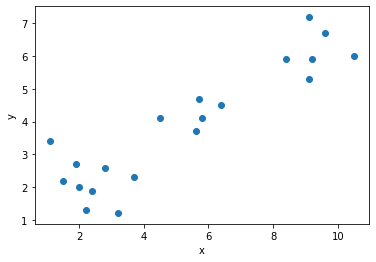

In [25]:
x = np.array([1.5, 2.2, 1.1, 3.2, 4.5, 5.6, 6.4, 9.1, 10.5, 9.1, 3.7, 9.6, 5.7, 2.8, 5.8, 8.4, 1.9, 2, 2.4, 9.2])
y = np.array([2.2, 1.3, 3.4, 1.2, 4.1, 3.7, 4.5, 5.3, 6.0, 7.2, 2.3, 6.7, 4.7, 2.6, 4.1, 5.9, 2.7, 2, 1.9, 5.9])
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')

O primeiro passo do algoritmo determina que o número de clusters seja escolhido. Para o exemplo, escolheremos ```k = 3```. 

Nos segundo e terceiro passos, criaremos ```k``` centróides aleatórios e associaremos cada ponto ao seus respectivo cluster.

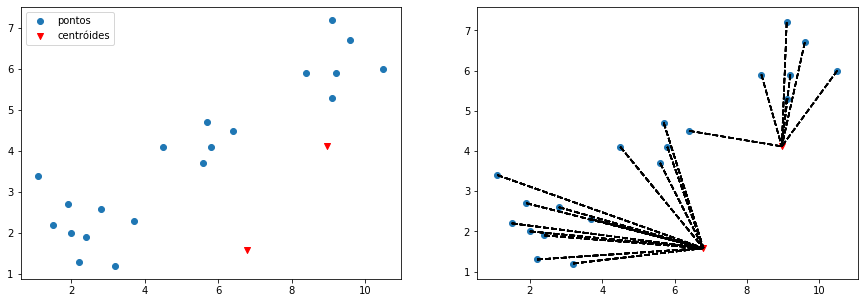

In [26]:
k = 2
restart = True
while restart:
    c_x = np.random.uniform(min(x), max(x), size=k)
    c_y = np.random.uniform(min(y), max(y), size=k)
    clusters = get_clusters(x, y, c_x, c_y)
    ok = True
    for i in range(k):
        if i not in clusters:
            ok = False
            break
    if ok:
        restart = False
            
plot_result(x, y, c_x, c_y, clusters)

No quarto passo recalculamos os centróides e voltamos ao passo 3 até que os centróides estabilizem. Executer o código abaixo retidas vezes até a estabilização aconteça. 

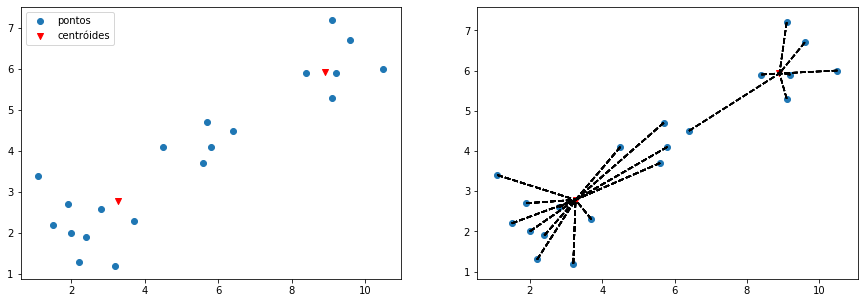

In [27]:
c_x, c_y, clusters = calculate_centroids(x, y, c_x, c_y)
plot_result(x, y, c_x, c_y, clusters)

Utilizaremos os dados contidos no arquivo ```exemplo1.csv``` para testar o algoritmo em um caso real.

In [28]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('dados/exemplo1.csv')
df.head()

,idade,conta_corrente
0,21.257389,783.127911
1,21.766573,979.747521
2,25.321033,1065.328054
3,23.919268,1195.758078
4,21.805298,1083.764450


No exemplo, temos a idade e o valor na conta corrente de diversos clientes de um banco. O objetivo do cluster será a identificação de grupos que possuam características semelhantes. Antes de aplicar o K-Means Cluster, faremos a plotagem do gráfico de dispersão das duas variáveis.

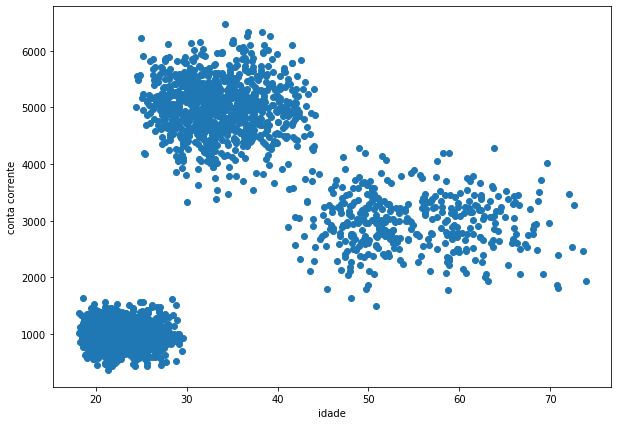

In [29]:
plt.figure(figsize=(10, 7))
plt.xlabel('idade')
plt.ylabel('conta corrente')
plt.scatter(df.idade, df.conta_corrente)

Observando o gráfico acima, percebemos a existência de 3 ou 4 grupos. Para aplicar o K-Means Cluster, faremos o número de cluster igual a três.

Para aplicar o algoritmo, utilizaremos o pacote de machine learning ```sklearn```. A classe de interesse chama-se ```KMeans``` e está disposta no subpacote ```sklearn.cluster```.

In [30]:
from sklearn.cluster import KMeans

Para identificar quais pontos estão associados a cada cluster, utilizamos a notação ```KMeans().fit_predict(DataFrame)```. Como parâmetros da classe ```KMeans```, passaremos ```n_clusters=numero_de_clusters``` e ```random_state=semente_do_gerador_aleatorio```. Atribuiremos o resultado em uma variável chamada ```clusters```.

In [31]:
clusters = KMeans(n_clusters=3, random_state=1).fit_predict(df)
clusters

array([0, 0, 0, ..., 2, 2, 2], dtype=int32)

O resultado é um ```array``` contendo a identificação do cluster (nesse caso: 0, 1 ou 2) para cada ponto. Para facilitar a análise, criaremos uma nova coluna do dataframe ```df``` chamada ```km_cluster3``` para guardar os clusters. 

In [32]:
df['km_cluster3'] = clusters
df.head()

,idade,conta_corrente,km_cluster3
0,21.257389,783.127911,0
1,21.766573,979.747521,0
2,25.321033,1065.328054,0
3,23.919268,1195.758078,0
4,21.805298,1083.764450,0


Para visualisar a divisão dos clusters, utilizamos a função abaixo.

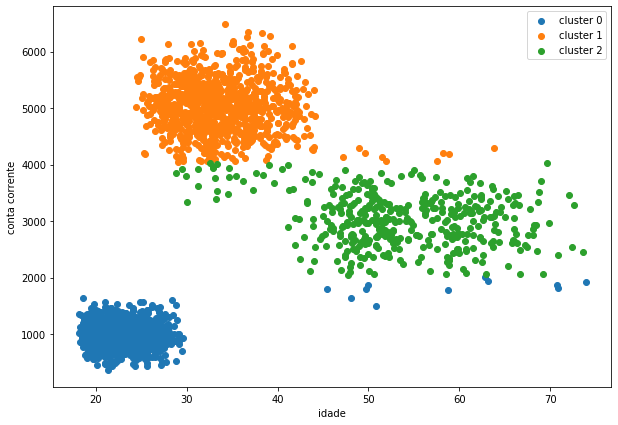

In [33]:
def plot(df, column_name):
    plt.figure(figsize=(10, 7))
    plt.xlabel('idade')
    plt.ylabel('conta corrente')
    for c in sorted(df[column_name].unique()):
        plt.scatter(df[df[column_name] == c].idade, df[df[column_name] == c].conta_corrente)
    plt.legend([f'cluster {c}' for c in sorted(df[column_name].unique())])
plot(df, 'km_cluster3')

Faremos um teste com 4 clusters. Para tanto, devemos lembrar de selecionar somente as colunas ```idade``` e ```conta_corrente```, já que o dataframe ```df``` possui agora uma nova coluna chamada ```km_cluster3```.

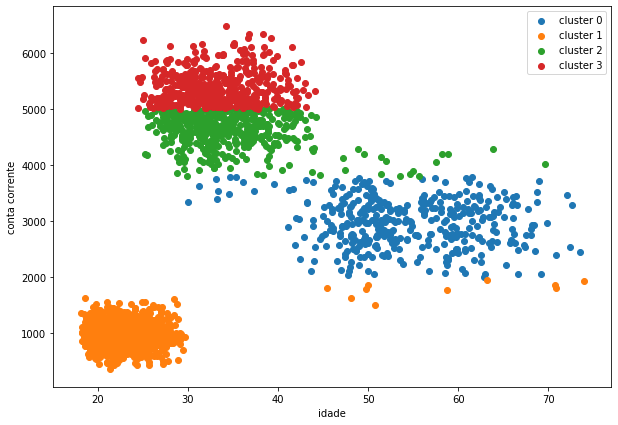

In [34]:
df['km_cluster4'] = KMeans(n_clusters=4, random_state=1).fit_predict(df[['idade', 'conta_corrente']])
plot(df, 'km_cluster4')

Temos um problema com as duas clusterizações. O algorítimo Kmeans parece ter dificuldade em identificar corretamente os clusters. Esse problema é mais evidente no exemplo com 4 clusters. Aparentemente, somente a conta corrente está sendo levada em consideração na clusterização.

Qual seria o motivo para o problema?

## Normalização dos dados
Ema casos reais, precisaremos lidar com atributos distribuidos em escalas diferentes. No ```exemplo1```, os valores da conta corrente possuem uma escala consideravelmente maior que a das idades. Isso faz com que o cálculo da distância etre pontos tenha um peso maior para a conta corrente, reduzindo o desempenho da clusterização. 

Uma forma de melhorar o desempenho da clusterização é através da normalização dos dados. O pacote ```sklearn```conta com uma grande quantidade de normalizadores. Utilizaremos para o exemplo o normalizador ```MinMaxScaler()```. A forma como esse normalizador normaliza os dados é através da compressão dos valores para o intervalo entre 0 e 1, onde 0 está associado ao menor valor contido na coluna e 1, ao maior valor. Os valores intermediários terão valores entre 0 e 1 de acordo com sua distância dos limites. Utilizaremos o comando ```fit_transform(DataFrame)``` para efetuar a normalização. O resultado será atribuido à variável ```X``` na forma de um ```array``` bi-dimensional.

In [35]:
from sklearn.preprocessing import MinMaxScaler

X = MinMaxScaler().fit_transform(df[['idade', 'conta_corrente']])
X

array([[0.05586473, 0.06720224],
       [0.06499436, 0.09938945],
       [0.12872564, 0.11339923],
       ...,
       [0.85424954, 0.36522222],
       [0.62401886, 0.42781034],
       [0.61473291, 0.54031447]])

Utilizando o ```X``` no lugar de ```df[['idade', 'conta_corrente']]```, obtemos o seguinte resultado para ```n_clusters=3```.

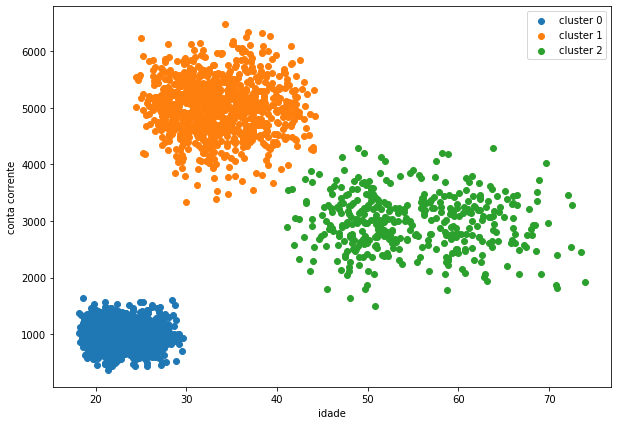

In [36]:
df['km_cluster3_norm'] = KMeans(n_clusters=3, random_state=1).fit_predict(X)
plot(df, 'km_cluster3_norm')

Agora sim! O normalização dos dados conseguiu resolver o problema do algoritmo de clusterização. Faremos, agora, um teste com 4 clusters.

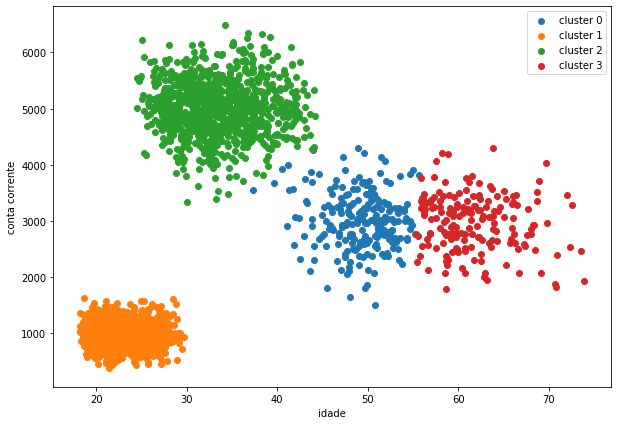

In [37]:
df['km_cluster4_norm'] = KMeans(n_clusters=4, random_state=1).fit_predict(X)
plot(df, 'km_cluster4_norm')

Para analisar as características de cada cluster, utilizamos o comando ```DataFrame.groupby()```, passando a coluna ```km_cluster4_norm``` como referência para o agrupamento. Utilizando o comando ```mean()```, temos a média dos atributos para cada cluster.

In [38]:
df.groupby('km_cluster4_norm').mean()[['idade', 'conta_corrente']]

,idade,conta_corrente
km_cluster4_norm,,
0,49.138864,3009.597350
1,22.819107,998.655215
2,33.426168,5021.985657
3,61.711233,2958.715649


Para obter todas as estatísticas descritivas de cada cluster, substituimmos o comando ```mean()``` por ```describe()```.

In [39]:
df.groupby('km_cluster4_norm').describe()[['idade', 'conta_corrente']]

idade                                             \
                   count       mean       std        min        25%   
km_cluster4_norm                                                      
0                  223.0  49.138864  3.387956  37.314664  47.161489   
1                 1200.0  22.819107  2.502528  18.141666  20.838562   
2                  894.0  33.426168  4.228608  24.467944  30.241160   
3                  183.0  61.711233  4.240022  55.370530  58.670790   

                                                  conta_corrente               \
                        50%        75%        max          count         mean   
km_cluster4_norm                                                                
0                 49.561465  51.528600  55.620688          223.0  3009.597350   
1                 22.480744  24.619146  29.626720         1200.0   998.655215   
2                 33.006056  36.473576  44.170525          894.0  5021.985657   
3                 61.011359  64.090927  73.914294          183.0  2958.715649   

                                                                     \
                         std          min          25%          50%   
km_cluster4_norm                                                      
0                 513.054081  1501.517494  2681.360834  2995.764042   
1                 209.617838   372.614477   858.910928  1000.726828   
2                 495.022965  3337.294704  4691.453146  5034.127769   
3                 500.038756  1781.750932  2603.396549  3014.889323   

                                            
                          75%          max  
km_cluster4_norm                            
0                 3320.074236  4288.692822  
1                 1140.345452  1631.308293  
2                 5347.240954  6481.241325  
3                 3324.200207  4291.223813

Cluster 0:

* idade: entre 37 e 55
* conta corrente: entre 1501 e 4288

Cluster 1:

* idade: entre 18 e 29 anos
* conta corrente: entre 372 e 1631 

Cluster 2:

* idade: entre 24 e 44 anos
* conta corrente: entre 3337 e 6481 

Cluster 3:

* idade: entre 55 e 73 anos
* conta corrente: entre 1781 e 4291 